In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#from sklearn.linear_model import Lasso

In [17]:
car_data = pd.read_csv('car data.csv')

In [19]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
# Check table info with car_data.info()
#check null values with .isnull() 

In [27]:
#Check counts of entries in columns

print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [29]:
#encode data by changind str to int

car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}}, inplace=True)

car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [36]:
#split data set

X = car_data.drop(columns=['Car_Name', 'Selling_Price'])
Y = car_data['Selling_Price']

In [37]:
#split into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [38]:
#model training

lin_reg = LinearRegression()


In [39]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [54]:
#predictions = lin_reg.predict([[2022, 5.34, 22000, 1, 0, 1, 0]])
#predictions

In [50]:
#r sqaured error

training_data = lin_reg.predict(X_train)
r_error = metrics.r2_score(Y_train, training_data)
r_error

0.8799451660493702

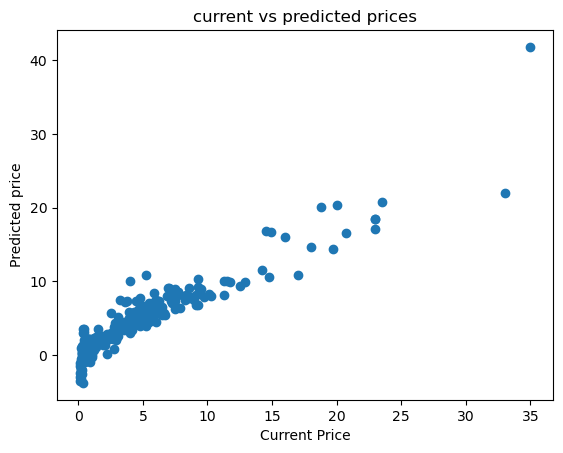

In [53]:
#plotting

plt.scatter(Y_train, training_data)
plt.xlabel("Current Price")
plt.ylabel("Predicted price")
plt.title("current vs predicted prices")
plt.show()